In [1]:
# sys, file and nav packages:
import datetime as dt
import locale

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.dates as mdates
from matplotlib import ticker
import seaborn as sns

# home brew utitilties
import resources.chart_kwargs as ck
import resources.sr_ut as sut

# images and display
from PIL import Image as PILImage
from IPython.display import Markdown as md

# set the locale to the language desired
# the locale is set back to to original at the the end of the script
loc = locale.getlocale()
lang =  "de_CH.utf8"
locale.setlocale(locale.LC_ALL, lang)

# set some parameters:
today = dt.datetime.now().date().strftime("%Y-%m-%d")
start_date = '2020-03-01'
end_date ='2021-05-31'

unit_label = 'pcs_m'
# banded color for table
a_color = 'dodgerblue'

# get your data:
survey_data = pd.read_csv('resources/checked_sdata_eos_2020_21.csv')
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")

# set the index of the beach data to location slug
dfBeaches.set_index('slug', inplace=True)

# set the code index and edit descriptions for display:
dfCodes.set_index('code', inplace=True)

# the surveyor designated the object as aluminum instead of metal
dfCodes.loc["G708", "material"] = "Metal"

# language specific
# importing german code descriptions and material type transaltions
de_codes = pd.read_csv("resources/codes_german_Version_1.csv")
de_codes.set_index("code", inplace=True)

for x in dfCodes.index:
    dfCodes.loc[x, "description"] = de_codes.loc[x, "german"]
    
dfCodes["material"] = dfCodes.material.map(lambda x: sut.mat_ge[x])

dfCodes = sut.shorten_the_value(["G178", "description", "Flaschenverschlüsse aus Metall"], dfCodes)
dfCodes = sut.shorten_the_value(["Gfrags", "description", "Fragmentierte Kunststoffstücke"], dfCodes)
dfCodes = sut.shorten_the_value(["G74", "description", "Schaumisolierung, XPS"], dfCodes)
dfCodes = sut.shorten_the_value(["G30", "description", "Snackpackungen"], dfCodes)

# make a map to the code descriptions
code_description_map = dfCodes.description

# make a map to the code materials
code_material_map = dfCodes.material

(luseprofilede)=
# Das Landnutzungsprofil

<a href="land_use_correlation.html" > English </a>

Das Bodennutzungsprofil ist eine numerische Darstellung der Art und des Umfangs der wirtschaftlichen Aktivität um den Erhebungsort. Das Profil wird anhand von Daten berechnet, die in Kartenschichten gespeichert sind, die im [Geoportal des Bundes](https://www.geo.admin.ch/) und im [Bundesamt für Statistik](https://www.bfs.admin.ch/bfs/en/home.html) verfügbar sind. 

Abfallobjekte sind eine Sammlung von weggeworfenen Gegenständen, die in der natürlichen Umgebung gefunden werden. Das Objekt selbst und der Kontext, in dem es gefunden wird, sind Indikatoren für die wirtschaftliche und geografische Herkunft. Wie das Land in der Nähe des Erhebungsortes genutzt wird, ist ein wichtiger Kontext, der bei der Bewertung der Erhebungsergebnisse berücksichtigt werden muss. {cite}`aydin` {cite}`grelaud`

Im September 2020 hat die Europäische Union Basislinien und Zielwerte für Abfallobjekte am Strand veröffentlicht. Nach Abwägung vieler Faktoren, darunter die Transparenz der Berechnungsmethode und die Leistung in Bezug auf Ausreisser, hat die EU entschieden, dass der Medianwert der Datenerhebungen zum Vergleich der Basiswerte zwischen den Regionen verwendet wird. Dies hat das Interesse der Gemeinden geweckt, punktuelle Abfallobjekte besser zu identifizieren und zu quantifizieren, da sie versuchen, den effizientesten Weg zur Einhaltung der Zielwerte zu finden. Die Identifizierung relevanter Landnutzungsmuster und -merkmale ist ein wesentliches Element in diesem Prozess. {cite}`threshholdeu` {cite}`eubaselines` {cite}`vanemmerick`

Hier schlagen wir eine Methode vor, um die Ergebnisse von Strand-Abfallaufkommen-Untersuchungen im Hinblick auf das Landnutzungsprofil im Umkreis von 1500 m um den Untersuchungsort auszuwerten. Die Erhebungsergebnisse der häufigsten Objekte werden mit Hilfe von Spearmans rho oder Spearmans ranked correlation, einem nicht-parametrischen Test auf Assoziation mit den gemessenen Landnutzungsmerkmalen getestet. {cite}`defspearmans`    {cite}`spearmansexplained`

## Berechnung des Landnutzungsprofils 

Das Landnutzungsprofil setzt sich aus den messbaren Eigenschaften zusammen, die geografisch verortet sind und aus den aktuellen Versionen von Statistique Suisse de la superficie und swissTlmRegio extrahiert werden können.  {cite}`superficie` {cite}`tlmregio`. 

Die folgenden Werte wurden in einem Radius von 1500 m um jeden Erhebungsort berechnet:

1. \% der Fläche, die auf Gebäude entfällt
2. \% der Fläche, die dem Wald vorbehalten ist 
3. \% der Fläche, die der Erholung dient 
4. \% der Fläche, die der Landwirtschaft zugeschrieben wird 
5. Länge aller Strassen und Wege in Kilometern (Schienenwege nicht eingeschlossen) 
6. Anzahl der bekannten Wasserabfluss-Schnittpunkte 

**Berechnung des Landnutzungsprofils**

Das Bundesamt für Statistik stellt die 'Statistique de superficie' zur Verfügung, ein Raster von Punkten 100m x 100m, das die Schweiz abdeckt. Jedem Punkt ist eine von 27 verschiedenen Landnutzungskategorien zugeordnet, die durch die Standardklassifikation von 2004 definiert sind. Dieses Raster dient als Grundlage für die Berechnung der Flächennutzung in der Umgebung des Erhebungsgebiets. Für diese Studie wurden die Landnutzungskategorien in sieben Gruppen aus den siebenundzwanzig verfügbaren Kategorien zusammengefasst. 

*Die aggregierten Werte und die entsprechenden Landnutzungskategorien*

* Gebäude: (1, 2, 3, 4, 5, 9) 
* Transport:(6, 7, 8)
* Erholoung: (10)
* Landwirtschaft: (11, 12, 13, 14, 15, 16, 18)
* Wälder: (17, 19, 20, 21, 22)
* Wasser: (23, 24)
* unproduktiv: (25, 26, 27)

Für jeden Standort wurde die kumulative Summe und die kumulative Summe jeder Gruppe innerhalb des 1500m-Puffers berechnet. Die dem Wasser zugewiesene Menge wurde von der kumulativen Summe abgezogen. Das Ergebnis wurde verwendet, um den Prozentsatz der Landnutzung für jede Kategorie zu berechnen. 

Die Kategorie Erholung umfasst verschiedene Anwendungen für die öffentliche Nutzung. Die Nutzung reicht von Sportplätzen bis hin zu Friedhöfen und umfasst alle Bereiche, die für soziale Aktivitäten zur Verfügung stehen. 

__Berechnung der Strassenlänge__

Die Strassenlänge wurde berechnet, indem die Kartenebene swissTLM3D_TLM_STRASSE mit dem 1500m-Puffer jedes Erhebungsortes geschnitten wurde. Alle Strassen und Wege wurden zu einer Linie zusammengefasst (QGIS: dissolve) und die Länge der Linie ist der angegebene Wert der Strassenkilometer. 

__Zählen der Einträge aus Flüssen__

Für Standorte an Seen wurde die Anzahl der sich überschneidenden Fluss-/Kanaleinleitungen im Umkreis von 1500 m von jedem Erhebungsstandort berechnet. Die Kartenebene swissTLM3D_TLM_FLIESSGEWAESSER (Flüsse) wurde mit swissTLM3D_TLM_STEHENDES_GEWAESSER (Seen) geschnitten (QGIS: "Linienschnittpunkte"), und die Anzahl der Schnittpunkte pro 1500m Puffer wurde gezählt (QGIS: "Punkte im Polygon zählen"). Die Kartenebene der Seen wurde um 100 Meter erweitert, um alle Abflussstellen oder Bäche zu erfassen, die in der Nähe des Sees enden.  {cite}`qgis_software` {cite}`tlmregio`

*Für die Berechnung des Landnutzungsprofils verwendete Kartenebenen. __Oben links:__ alle messbaren Werte innerhalb von 1500m. __Oben rechts:__ Strassen und Flusskreuzungen innerhalb von 1500 m. __Unten rechts:__ Landnutzungspunkte, die zur Berechnung von % der Gesamtfläche und der Gesamtfläche verwendet werden.*

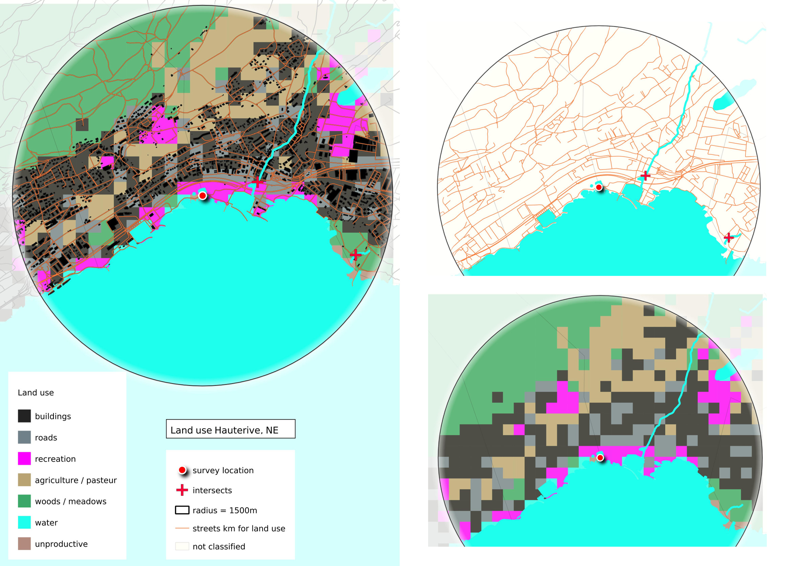

In [2]:
sut.display_image_ipython("resources/images/land_use_profile/land_use_dispaly_20.jpeg", thumb=(800, 800))

_Berechnetes Landnutzungsprofil von Hauterive-petite-plage, NE 31-07-2020._

* zu Gebauden 32.7%
* zur Freizeitgestaltung: 9.9% 
* für die Landwirtschaft: 18.9% 
* zu Wald: 24.3%
* Kilometer Strassen 85
* Fluss kreutz: 2

*__Unten:__ Datenerhebungen in einer ländlichen Umgebung. Kallnach, BE 26.02.2021*

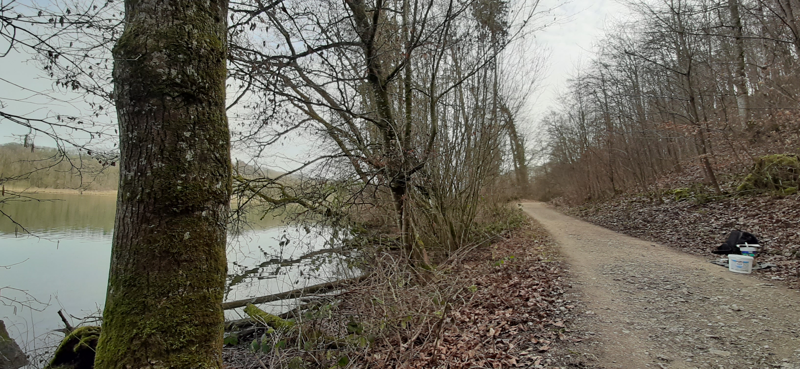

In [3]:
sut.display_image_ipython("resources/images/land_use_profile/tightquarterswholensee.jpg", thumb=(800, 600))

*__Unten:__ Datenerhebungen in einer städtischen Umgebung. Vevey, 28.02.2021*

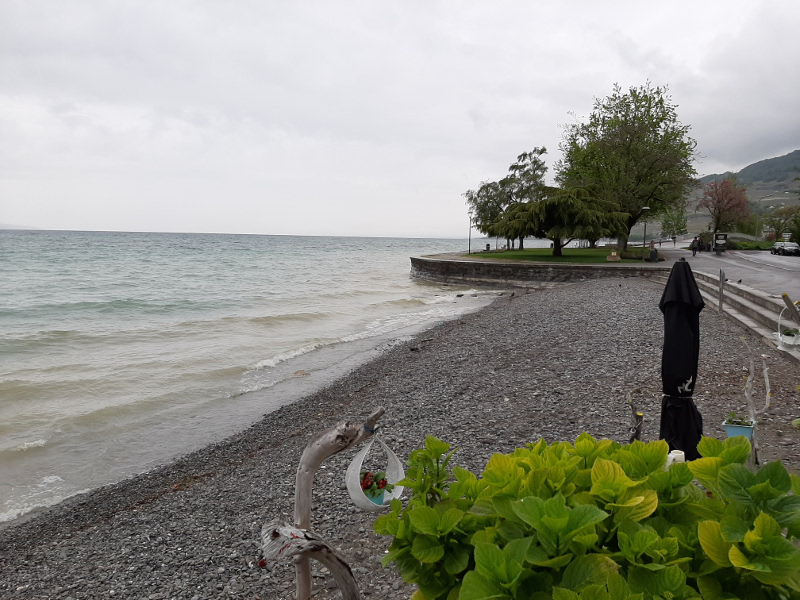

In [4]:
sut.display_image_ipython("resources/images/land_use_profile/urban2_800_600.jpg", thumb=(800, 600))

<!-- <table>
<tr>
<th>Json 1</th>
<th>Markdown</th>
</tr>
<tr>
<td>
<pre>
{
  "id": 1,
  "username": "joe",
  "email": "joe@example.com",
  "order_id": "3544fc0"
}
</pre>
</td>
<td>

```json
{
  "id": 5,
  "username": "mary",
  "email": "mary@example.com",
  "order_id": "f7177da"
}
```

</td>
</tr>
</table> -->


### Landnutzungsprofil des Projekts

Die Landnutzung wird als prozentualer Anteil der Gesamtfläche angegeben, der jeder Landnutzungskategorie innerhalb eines Radius von 1500 m um den Erhebungsort zugeordnet wird. Das Verhältnis der Anzahl der in den verschiedenen Landnutzungsprofilen durchgeführten Proben ist ein Indikator für die ökologischen und wirtschaftlichen Bedingungen in der Umgebung der Erhebungsorte. 

*Verteilung der Anzahl der Datenerhebungen für die verschiedenen Landnutzungsattribute, n=350 Stichproben* 

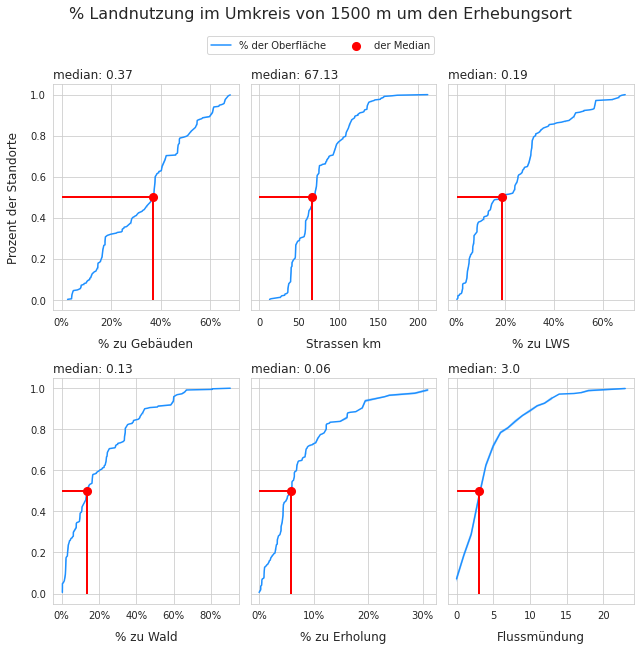

In [5]:
# explanatory variables that are being considered
luse_exp = ['% to buildings', '% to recreation', '% to agg', '% to woods', 'streets km', 'intersects']
luse_ge = sut.luse_ge
# columns needed
use_these_cols = ['loc_date' ,
                  'date',
                  '% to buildings',
                  '% to trans',
                  '% to recreation',
                  '% to agg',
                  '% to woods',
                  'population',
                  'water_name_slug',
                  'streets km',
                  'intersects',
                  'groupname',
                  'code'
                 ]

# the land use data was unvailable for these municipalities
no_land_use = ['Walenstadt', 'Weesen', 'Glarus Nord', 'Quarten']

# slice the data by start and end date, remove the locations with no land use data
use_these_args = ((survey_data["date"] >= start_date)&(survey_data["date"] <= end_date)&(~survey_data.city.isin(no_land_use)))
survey_data = survey_data[use_these_args].copy()

# format the data and column names
survey_data['date'] = pd.to_datetime(survey_data.date)

# the survey total for each survey indifferent of object
dfdt = survey_data.groupby(use_these_cols[:-2], as_index=False).agg({unit_label:'sum', 'quantity':'sum'})

sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(9,9), sharey="row")

for i, n in enumerate(luse_exp):
    r = i%2
    c = i%3
    ax=axs[r,c]  
    
    # the ECDF of the land use variable
    the_data = ECDF(dfdt[n].values)
    sns.lineplot(x=the_data.x, y= the_data.y, ax=ax, color='dodgerblue', label="% der Oberfläche")
    
    # get the median % of land use for each variable under consideration from the data
    the_median = dfdt[n].median()
    
    # plot the median and drop horzontal and vertical lines
    ax.scatter([the_median], 0.5, color='red',s=50, linewidth=2, zorder=100, label="der Median")
    ax.vlines(x=the_median, ymin=0, ymax=0.5, color='red', linewidth=2)
    ax.hlines(xmax=the_median, xmin=0, y=0.5, color='red', linewidth=2)
    
    #remove the legend from ax   
    ax.get_legend().remove()
    if i <= 3:
        if i == 0:            
            ax.set_ylabel("Prozent der Standorte", **ck.xlab_k)
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0, 0, "%"))        
    else:
        pass
    handles, labels = ax.get_legend_handles_labels()
    ax.set_xlabel(luse_ge[n], **ck.xlab_k)
    
    # add the median value from all locations to the ax title
    ax.set_title(F"median: {(round(the_median, 2))}",fontsize=12, loc='left')
    ax.set_xlabel(luse_ge[n], **ck.xlab_k)

plt.tight_layout()
plt.subplots_adjust(top=.88, hspace=.3)
plt.suptitle("% Landnutzung im Umkreis von 1500 m um den Erhebungsort", ha="center", y=1, fontsize=16)
fig.legend(handles, labels, bbox_to_anchor=(.5,.94), loc="center", ncol=3)        
plt.show()

Die Landnutzung in der Umgebung der Datenerhebungen war stärker auf Gebäude als auf Landwirtschaft und Wald ausgerichtet. So entfielen bei der Hälfte aller Datenerhebungen mindestens 37% der Flächennutzung auf Gebäude gegenüber 19% für die Landwirtschaft und 13% für Wälder. Bei der Hälfte aller Stichproben betrug der Anteil der Landnutzung für Erholungszwecke mindestens 6%. 

Die Länge des Strassennetzes innerhalb der Pufferzone unterscheidet zwischen Orten, die ansonsten ähnliche Landnutzungsmerkmale aufweisen. Die Länge des Strassennetzes pro Pufferzone reicht von 13 km bis 212 km. 50 % der Datenerhebungen hatten ein Strassennetz von weniger als 67 km. 

Die Anzahl der Datenerhebungen reicht von Null bis 23, von den 354 Datenerhebungen hatten 50% 3 oder weniger Kreuzungen innerhalb von 1500m vom Erhebungsort. Die Grösse des kreuzenden Flusses oder Kanals wurde nicht berücksichtigt. Datenerhebungen an Flüssen haben null Kreuzungen. 

Die Bevölkerung (nicht gezeigt) stammt aus statpop 2018 und stellt die Bevölkerung der Gemeinde dar, die den Erhebungsort umgibt. Die kleinste Einwohnerzahl betrug 442 und die grösste 415'367. Von den gesamten Datenerhebungen stammen 50% aus Gemeinden mit einer Einwohnerzahl von mindestens 12'812. 

### Auswahl der Datenerhebungsorte

Die Standorte der Datenerhebungen wurden anhand der folgenden Kriterien ausgewählt: 

* Daten aus früheren Datenerhebungen (SLR, MCBP) 
* Ganzjährig sicherer Zugang 
* Innerhalb von 30 Minuten zu Fuss von den nächsten öffentlichen Verkehrsmitteln entfernt 

Die Erhebungsorte repräsentieren die mit öffentlichen Verkehrsmitteln erreichbaren Landnutzungsbedingungen von etwa 1,7 Millionen Menschen.  

## Zuordnung von Landnutzung zu Erhebungsergebnissen

Es gibt 350 Datenerhebungen von 129 Standorten entlang von Flüssen und Seen. Der Mittelwert war mehr als doppelt so hoch wie der Median, was die extremen Werte widerspiegelt, die für Strand-Abfallobjekte-Untersuchungen typisch sind. {cite}`eubaselines` 

*__links__ Erhebungsergebnisse und __rechts__:kumulative Verteilung alle Seen und Flüsse (ohne Walensee). Anzahl der Proben: 350,  Anzahl der Standorte:129, Median:2.14 pcs/m, Mittelwert:4.15 pcs/m*

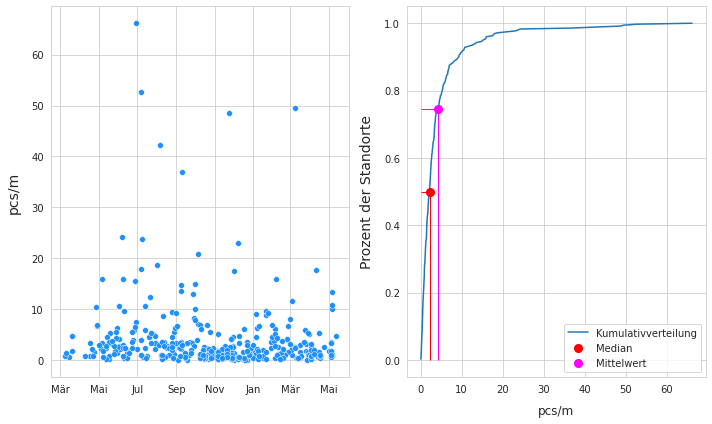

In [6]:
# set the date intervals for the chart
months = mdates.MonthLocator(interval=1)
months_fmt = mdates.DateFormatter('%b')
days = mdates.DayLocator(interval=7)

# set the grid for the chart
sns.set_style("whitegrid")

# chart the daily totals and the ECDF of all surveys under consideration
fig, ax = plt.subplots(1,2, figsize=(10,6), sharey=False)

axone=ax[0]
axtwo = ax[1]

axone.set_ylabel("pcs/m", **ck.xlab_k14)
axone.xaxis.set_minor_locator(days)
axone.xaxis.set_major_formatter(months_fmt)
axone.set_xlabel(" ")

axtwo.set_ylabel("Prozent der Standorte", **ck.xlab_k14)
axtwo.set_xlabel("pcs/m", **ck.xlab_k)

# time series plot of the survey results
sns.scatterplot(data=dfdt, x='date', y=unit_label, color=a_color, s=34, ec='white', ax=axone)

# ecdf of the survey results
this_ecdf = ECDF(dfdt.pcs_m.values)

# plot the cumulative disrtibution
sns.lineplot(x=this_ecdf.x,y=this_ecdf.y, ax=axtwo, label='Kumulativverteilung')

# get the median and mean from the data
the_median = dfdt.pcs_m.median()
the_mean = dfdt.pcs_m.mean()

# get the percentile ranking of the mean
p_mean = this_ecdf(the_mean)

# plot the median and drop horzontal and vertical lines
axtwo.scatter([the_median], 0.5, color='red',s=50, linewidth=2, zorder=100, label="Median")
axtwo.vlines(x=the_median, ymin=0, ymax=0.5, color='red', linewidth=1)
axtwo.hlines(xmax=the_median, xmin=0, y=0.5, color='red', linewidth=1)

# plot the mean and drop horzontal and vertical lines
axtwo.scatter([the_mean], p_mean, color='magenta',s=50, linewidth=2, zorder=100, label="Mittelwert")
axtwo.vlines(x=the_mean, ymin=0, ymax=p_mean, color='magenta', linewidth=1)
axtwo.hlines(xmax=the_mean, xmin=0, y=p_mean, color='magenta', linewidth=1)

handle, labels = axtwo.get_legend_handles_labels()

plt.legend(handle,labels)

plt.tight_layout()

plt.show()

### Spearmans $\rho$ ein Beispiel 

Die Rangkorrelation nach Spearmans testet auf eine statistisch signifikante monotone Beziehung oder Assoziation zwischen zwei Variablen. Die Hypothese lautet, dass es keinen Zusammenhang zwischen dem Landnutzungsprofil und den Erhebungsergebnissen gibt. {cite}`defspearmans` 

Die Testergebnisse beziehen sich auf die Richtung (rho) einer Assoziation und darauf, ob diese Assoziation wahrscheinlich auf einen Zufall zurückzuführen ist (p-Wert) oder nicht.) Damit ein Test als signifikant gilt, muss der p-Wert kleiner als 0,05 sein. {cite}`impspearmans`

1. Die Nullhypothese: Es gibt keine monotone Beziehung zwischen den beiden Variablen 
2. Die Alternativhypothese: Es besteht eine monotone Beziehung und das Vorzeichen (+/-) gibt die Richtung an 

Sie gibt keine Auskunft über das Ausmass der Beziehung. Betrachten Sie als Beispiel das Verhältnis der Erhebungsergebnisse von Zigarettenstummeln in Bezug auf die Menge an Land, die Gebäuden oder der Landwirtschaft zugerechnet wird.{cite}`spearmansexplained`

*__Links:__ Datenerhebungen der Zigarettenstummel in Bezug auf den prozentualen Anteil der Grundstücke an den Gebäuden. rho= 0,39, p-value < .001. __Rechts:__ Datenerhebungen der Zigarettenstummel in Bezug auf den Prozentsatz der landwirtschaftlichen Nutzfläche. rho= -0,31, p-value < .001.*

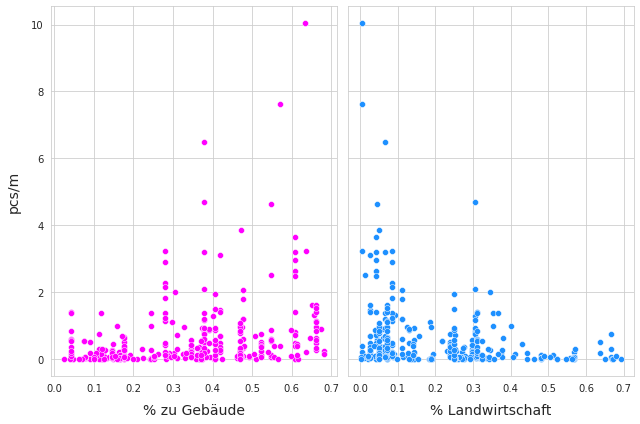

In [7]:
# data for the example
data = survey_data[survey_data.code == "G27"].groupby(["loc_date","% to buildings", "% to agg"], as_index=False)[unit_label].sum()

# run the test under the two conditions
sprmns_b = stats.spearmanr(data["% to buildings"], data[unit_label])
sprmns_a = stats.spearmanr(data["% to agg"], data[unit_label])

# plot the survey results with respect to the land use profile
fig, axs = plt.subplots(1,2, figsize=(9,6), sharey=True)

sns.scatterplot(data=data, x="% to buildings", y=unit_label, ax=axs[0], color='magenta')
sns.scatterplot(data=data, x="% to agg", y=unit_label, ax=axs[1], color='dodgerblue')

axs[0].set_xlabel("% zu Gebäude", **ck.xlab_k14)
axs[1].set_xlabel("% Landwirtschaft", **ck.xlab_k14)

axs[0].set_ylabel("pcs/m", **ck.xlab_k14)

plt.tight_layout()
plt.show()

Betrachtet man die Erhebungsergebnisse für Zigarettenstummel in Bezug auf den prozentualen Anteil von bebauten oder landwirtschaftlich genutzten Flächen, ist der Wert von rho entgegengesetzt.  

### Zuordnung der Erhebungssummen zur Bodennutzung

*Ergebnisse des Spearmans-Rangkorrelationstests: Summen der Datenerhebungen in Bezug auf das Landnutzungsprofil*

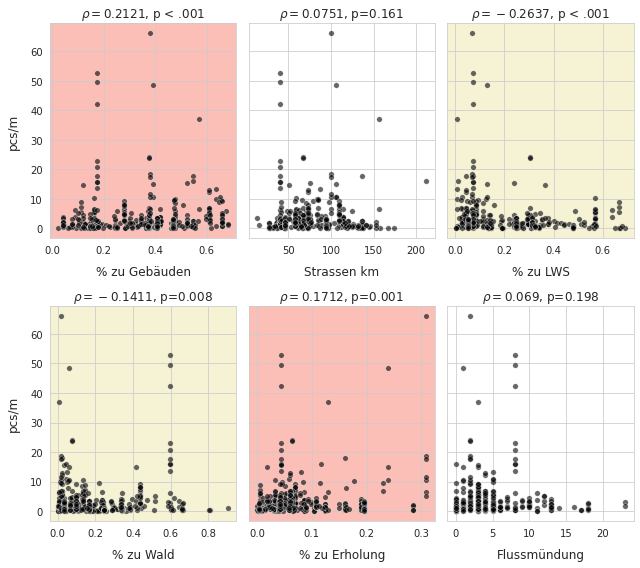

In [8]:
# correlation  of survey total to land use attributes:
fig, axs = plt.subplots(2, 3, figsize=(9,8), sharey="row")

for i, n in enumerate(luse_exp):
    r = i%2
    c = i%3
    ax=axs[r,c] 
    ax, corr, a_p = sut.make_plot_with_spearmans(dfdt, ax, n, unit_label=unit_label)
    if c == 0:
        ax.set_ylabel('pcs/m', **ck.xlab_k)
    ax.set_xlabel(luse_ge[n], **ck.xlab_k)
    if a_p <= .001:
        title_str = "p < .001"
    else:
        title_str = F"p={round(a_p, 3)}"
    
    ax.set_title(rF"$\rho={round(corr,4)}$, {title_str}")
    
    # find p    
    if a_p < 0.05:
        if corr > 0:
            ax.patch.set_facecolor('salmon')
            ax.patch.set_alpha(0.5)
        else:
            ax.patch.set_facecolor('palegoldenrod')
            ax.patch.set_alpha(0.5)

plt.tight_layout()
plt.show()

Im Allgemeinen kann ein positiver Zusammenhang zwischen den Erhebungsergebnissen und dem prozentualen Anteil der Flächen für Gebäude oder Erholung und ein negativer Zusammenhang mit Wäldern und Landwirtschaft angenommen werden. 

### Zuordnung der häufigsten Objekte zur Landnutzung 

Die häufigsten Objekte sind alle Objekte, die entweder die zehn häufigsten nach Anzahl sind oder alle Objekte, die in mindestens 50% aller Datenerhebungen identifiziert wurden, was ungefähr 68% aller identifizierten und gezählten Objekte entspricht. Einige Objekte wurden in 50 % der Fälle identifiziert, kamen aber nicht so häufig vor, dass sie in die "Top-Ten-Liste" aufgenommen werden konnten. 

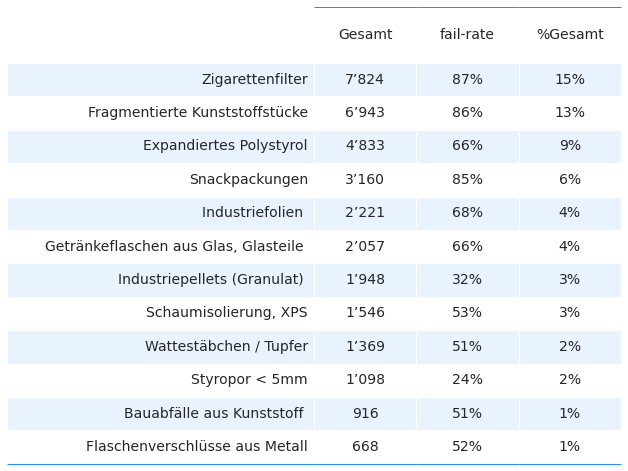

In [9]:
# common aggregations of survey data
agg_pcs_quantity = {unit_label:"sum", "quantity":"sum"}
agg_pcs_median = {unit_label:"median", "quantity":"sum"}

# cumulative statistics for each code
c_t_params = dict(agg=agg_pcs_median, description_map=code_description_map, material_map=code_material_map)
code_totals = sut.the_aggregated_object_values(survey_data, **c_t_params)    

# all codes with a fail rate > fail rate = most common objects
better_than_50 = code_totals[code_totals["fail rate"] >= 50]

# the ten objects with the greatest quantity
t_ten = code_totals.sort_values(by="quantity", ascending=False)[:10]

# combine the most abundant with the most common
abundant_codes = list(set(t_ten.index) | set(better_than_50.index))

# get the survey data for the most common codes for the final table data
cols_to_use = ['item','quantity', 'fail rate', '% of total']
m_common = code_totals.loc[abundant_codes, cols_to_use].sort_values(by="quantity", ascending=False)
m_common["% of total"] = ((m_common.quantity/survey_data.quantity.sum())*100).astype('int')

# format values for table
m_common['% of total'] = m_common["% of total"].map(lambda x: F"{x}%")
m_common['quantity'] = m_common.quantity.map(lambda x: f"{locale.format_string('%d', int(x), grouping=True)}")
m_common['fail rate'] = m_common['fail rate'].map(lambda x: F"{x}%")

mcc = m_common[cols_to_use]
colLabels = ["Artikel", "Gesamt", "fail-rate", "%Gesamt"]

fig, axs = plt.subplots(figsize=(11,len(m_common)*.7))

sut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(mcc.values,  colLabels=colLabels , colWidths=[.48, .16,.16,.16], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,m_common,cols_to_use, a_color)
a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")
a_summary_table_one.set_fontsize(14)

plt.show()
plt.tight_layout()
plt.close()

#### Ergebnisse Spearmans $\rho$

Aus der ersten Abbildung lässt sich ein positiver Zusammenhang zwischen der Anzahl der identifizierten Objekte und dem prozentualen Anteil der Flächen, die Gebäuden und Erholungsgebieten zugeordnet sind, ableiten. Das Umgekehrte gilt für den prozentualen Anteil von Landwirtschaft und Wald. Es gibt keine statistische Grundlage für die Annahme eines Zusammenhangs zwischen der Länge von Strassen oder der Anzahl von Flusskreuzungen und dem Gesamtergebnis der Erhebung. 

Das Ergebnis von Spearman's rho für die am häufigsten vorkommenden Objekte steht im Zusammenhang mit den Ergebnissen in der vorangegangenen Abbildung und veranschaulicht, wie sich verschiedene Objekte unter verschiedenen Bedingungen anhäufen. 

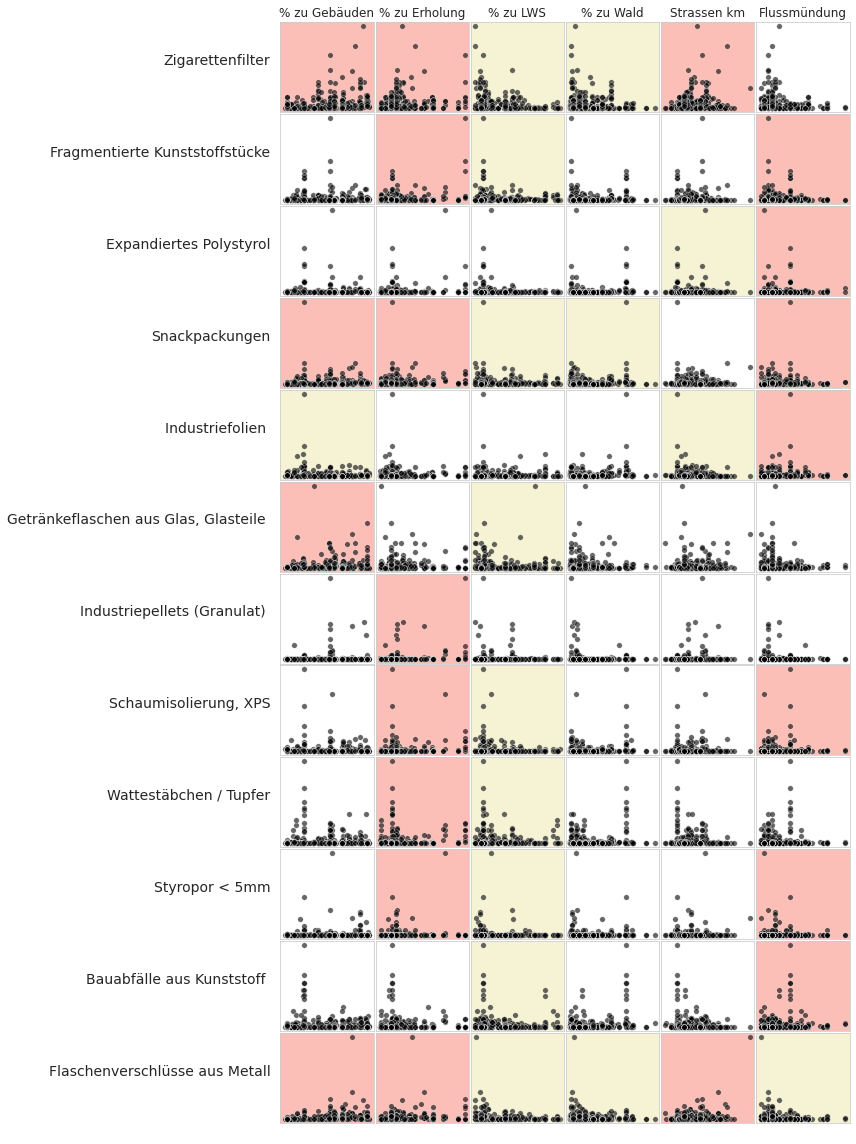

In [10]:
fig, axs = plt.subplots(len(abundant_codes),len(luse_exp), figsize=(len(luse_exp)+6,len(abundant_codes)+4), sharey='row')

for i,code in enumerate(mcc.index):
    data = survey_data[survey_data.code == code]
    for j, n in enumerate(luse_exp):
        this_data = data.groupby(['loc_date', n], as_index=False)[unit_label].sum()
        ax=axs[i, j]
        ax.grid(False)
        ax.tick_params(axis='both', which='both',bottom=False,top=False,labelbottom=False, labelleft=False, left=False)
       
        if i == 0:
            ax.set_title(F"{luse_ge[n]}")
        else:
            pass
        
        if j == 0:
            ax.set_ylabel(F"{code_description_map[code]}", rotation=0, ha='right', **ck.xlab_k14)
            ax.set_xlabel(" ")
        else:
            ax.set_xlabel(" ")
            ax.set_ylabel(" ")
               
        _, corr, a_p = sut.make_plot_with_spearmans(this_data, ax, n, unit_label=unit_label)
        
        if a_p < 0.05:
            if corr > 0:
                ax.patch.set_facecolor('salmon')
                ax.patch.set_alpha(0.5)
            else:
                ax.patch.set_facecolor('palegoldenrod')
                ax.patch.set_alpha(0.5)

plt.tick_params(labelsize=14, which='both', axis='both')

plt.tight_layout()

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

### Spearmans interpretieren  

Eine positive Assoziation bedeutet, dass die Erhebungsergebnisse tendenziell zunehmen, wenn der prozentuale Wert des Landnutzungsmerkmals steigt. Dies kann auf eine Kovarianz der Attribute zurückzuführen sein. In jedem Fall ist eine positive Assoziation ein Signal dafür, dass sich die Objekte unter diesen Bedingungen eher häufen. 

Eine negative Assoziation bedeutet, dass das Landnutzungsmerkmal oder -attribut die Akkumulation des Objekts nicht erleichtert. Dieses Ergebnis ist für landwirtschaftliche Flächen und Wälder auf nationaler Ebene üblich. Eine negative Assoziation ist ein Signal dafür, dass die Objekte unter diesen Bedingungen nicht zur Akkumulation neigen. 

Keine oder wenige Assoziationen bedeutet, dass die Landnutzungsmerkmale keinen Einfluss auf die Akkumulation des Objekts hatten. Die Erhebungsergebnisse der häufigsten Objekte ohne oder mit wenigen Assoziationen lassen sich in zwei Kategorien einteilen: 

* Allgegenwärtig: hohe Fail-Pass Rate, hohe Stückzahl pro Meter. Unabhängig von der Landnutzung im gesamten Untersuchungsgebiet in gleichbleibenden Raten gefunden 

* Vorübergehend: niedrige Fail-Pass Rate, hohe Menge, hohe Stückzahl pro Meter, wenige Verbände. Gelegentlich in grossen Mengen an bestimmten Orten gefunden 

## Diskussion 

Insgesamt war es wahrscheinlich, dass Datenerhebungen an Orten mit mehr Gebäuden und Erholungsgebieten die Anhäufung von Gegenständen an der Küste begünstigten. Betrachtet man die häufigsten Gegenstände, so wurden nur vier der zwölf Gegenstände in Anwesenheit von mehr Gebäuden häufiger identifiziert. Dabei handelt es sich in der Regel um Gegenstände, die mit dem Verzehr von Lebensmitteln und/oder Tabakwaren in der Nähe des Ortes zusammenhängen. Das deutet darauf hin, dass in stark frequentierten Gebieten in Wassernähe noch einiges an Vorbeugung und Abschwächung möglich ist. 

Sechs der zwölf Objekte haben jedoch keine positive Assoziation zur Landnutzung, die Gebäuden zugeschrieben wird, wurden aber in mindestens 50% aller Datenerhebungen gefunden. Diese Gegenstände werden im Allgemeinen mit der beruflichen Nutzung oder im Fall der Wattestäbchen mit der persönlichen Hygiene in Verbindung gebracht: 

* Kunststoff-Bauabfälle 
* fragmentierte Kunststoffe 
* Industriefolien 
* expandiertes Polystyrol 
* Wattestäbchen/Stäbchen 
* Isolierung, einschliesslich Sprühschäume 

Ausserdem haben diese Objekte im Vergleich zu Produkten, die mit Tabakwaren oder Nahrungsmitteln in Verbindung stehen, im Allgemeinen weniger positive Assoziationen. Dies deutet darauf hin, dass das entsprechende Landnutzungsmerkmal derzeit nicht berücksichtigt wird und/oder diese Objekte unabhängig von den Landnutzungsmerkmalen in ähnlichen Mengen identifiziert werden. Dies deutet darauf hin, dass diese Objekte in der Umwelt allgegenwärtig sind. 

Schliesslich wurden zwei der zwölf häufigsten Objekte in weniger als 50% der Datenerhebungen gefunden und weisen nur wenige positive Assoziationen auf: 

* Industriepellets 
* expandierte Schaumstoffe < 5mm 

Diese Objekte werden in grossen Mengen sporadisch an bestimmten Orten gefunden. Sie wurden in allen Untersuchungsgebieten und in allen Seen identifiziert. Industriepellets haben einen sehr spezifischen Verwendungszweck und Kundenstamm, so dass es möglich ist, auf der Grundlage der Dichte und des Standorts der identifizierten Pellets und des Standorts des nächstgelegenen Verbrauchers oder Herstellers von Pellets, siehe [Gemeinsame Verantwortung](transportde), die Quelle zu bestimmen und die Auswirkungen zu verringern.

### Anwendung

Die Anzahl der Stichproben, die verwendet werden, um eine Assoziation mit Spearmans zu bestimmen, muss vorsichtig sein.  

und wie viel Gewicht den Ergebnissen beigemessen wird. Die Ergebnisse für Zigarettenfilter sind ein gutes Beispiel. Die Diagramme zeigen eindeutig sowohl negative als auch positive Assoziationen in Abhängigkeit von der Landnutzung, aber rho ist kleiner als |0,5|. Es handelt sich also keineswegs um eine lineare Beziehung und das Ausmass bleibt unbestimmt. 

Die Betroffenen sollten diese Ergebnisse und deren Anwendbarkeit auf ihre spezifische Situation prüfen. Eine Schlussfolgerung, die gezogen werden kann, ist, dass es eine Methode gibt, um auf der Grundlage der empirischen Daten aus den Datenerhebungen mit angemessener Sicherheit Zonen der Akkumulation zu identifizieren. Diese Ergebnisse ermöglichen es den Akteuren, ihre Prioritäten auf die Herausforderungen zu stützen, die für ihre Region oder Situation spezifisch sind. 

Der Spearmans-Korrelationskoeffizient lässt sich leicht anwenden, sobald der endgültige Datensatz bestimmt wurde. Der Wert des Koeffizienten ändert sich jedoch je nach Erhebungsgebiet oder See, in dem der Test angewendet wird. Das bedeutet, dass das Verständnis und die Interpretation dieser Ergebnisse nicht nur ein nationales, sondern auch ein regionales und kommunales Anliegen ist. 

Warum 1500 Meter? Für diese Studie haben wir uns mit Objekten befasst, die hohe Werte für rho bei kleineren Radien aufwiesen, die dem Massstab der bereitgestellten Daten angemessen waren. Es wurden auch andere Entfernungen in Betracht gezogen (2km, 2,5km, ... 5km und 10km). Generell gilt, dass mit zunehmendem Radius die den Gebäuden zugewiesene Fläche abnimmt und damit auch der Wert von rho. Dieses Thema wurde in einem Artikel, der derzeit für das Peer-Review-Verfahren vorbereitet wird, ausführlicher behandelt. 

Die Überprüfung einer Assoziation erfolgt durch die Berücksichtigung aller anderen Schlüsselindikatoren und das Urteil von Experten. Das städtische Wartungspersonal ist mit den Bedingungen vor Ort vertraut und ist eine der besten Informationsquellen. Die Wiederholung von Stichproben an einem bestimmten Ort für einen bestimmten Zeitraum und der Vergleich der Ergebnisse mit den Ausgangswerten für das Erhebungsgebiet ist ebenfalls eine zuverlässige Methode, um die Leistung in Bezug auf das Erhebungsgebiet zu bestimmen. 

Der Rangkorrelationskoeffizient ist eine effiziente und zuverlässige Methode, mit der sich Landnutzungsklassifizierungen identifizieren lassen, die mit erhöhten oder verringerten Mengen an bestimmten Abfallobjekten verbunden sind. Das Ausmass der Beziehung in Bezug auf die Anzahl der Objekte auf dem Boden bleibt jedoch undefiniert. 

Um mehr darüber zu erfahren, wie sich die Erhebungsergebnisse je nach Landnutzung ändern und/oder gleich bleiben, siehe [_Gemeinsame Verantwortung_](transportde).

Um zu verstehen, wie die Abfallobjekte für diesen Bericht berechnet wurden, siehe [_Abfallobjekte am Strand_](threshholdde).